# SoufianeJD and Othmane Dendane's Final Project Sonar Mines vs RocksProb1(Classification)

# I. Load The Data

# I.1 Import libraries

In [9]:
# Prepare Problem
import warnings
warnings.filterwarnings('ignore')
# Load libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# I.2 Load Dataset

In [10]:
# Load dataset
filename = 'sonar.all-data.csv' #Loading dataset into the variable filename
names = ['A', 'B', 'C', 'D', 'E','F']#Defining the attributs in the var names
dataset = read_csv(filename, names=names)#reading the datasets+the giving attributs

# II. Summarizing the Data

# II.1 Dimensions of Dataset

In [11]:
# shape
print(dataset.shape)# dimensions of dataset (x,y)  x = the ligne of the dataset  / y=the attributs givin

(208, 6)


# II.2 Peek at the Data

In [12]:
# head
print(dataset.head(5))
# tail
print(dataset.tail(5))

                                                                                                                                                                                                                                                                                                                                                                                                       A  \
0.0200 0.0371 0.0428 0.0207 0.0954 0.0986 0.1539 0.1601 0.3109 0.2111 0.1609 0.1582 0.2238 0.0645 0.0660 0.2273 0.3100 0.2999 0.5078 0.4797 0.5783 0.5071 0.4328 0.5550 0.6711 0.6415 0.7104 0.8080 0.6791 0.3857 0.1307 0.2604 0.5121 0.7547 0.8537 0.8507 0.6692 0.6097 0.4943 0.2744 0.0510 0.2834 0.2825 0.4256 0.2641 0.1386 0.1051 0.1343 0.0383 0.0324 0.0232 0.0027 0.0065 0.0159 0.0072  0.0167   
0.0453 0.0523 0.0843 0.0689 0.1183 0.2583 0.2156 0.3481 0.3337 0.2872 0.4918 0.6552 0.6919 0.7797 0.7464 0.9444 1.0000 0.8874 0.8024 0.7818 0.5212 0.4052 0.3957 0.3914 0.3250 0.3200 0.3271 0.2767 0.4423 0.202

# II.3 Statistical Summary of all attributes

In [13]:
# descriptions
print(dataset.describe()) 

                A           B           C           D           E
count  208.000000  208.000000  208.000000  208.000000  208.000000
mean     0.008222    0.007820    0.007949    0.007941    0.006507
std      0.005736    0.005785    0.006470    0.006181    0.005031
min      0.000400    0.000300    0.000300    0.000100    0.000600
25%      0.004400    0.003700    0.003600    0.003675    0.003100
50%      0.006850    0.005950    0.005800    0.006400    0.005300
75%      0.010575    0.010425    0.010350    0.010325    0.008525
max      0.039400    0.035500    0.044000    0.036400    0.043900


# II.4 Class Distribution

In [14]:
# class distribution
print(dataset.groupby('A').size())

A
0.0004    1
0.0006    1
0.0007    1
0.0008    1
0.0011    1
         ..
0.0244    1
0.0249    1
0.0277    1
0.0326    1
0.0394    1
Length: 122, dtype: int64


# III. Data Visualization

# III.1 Univariate

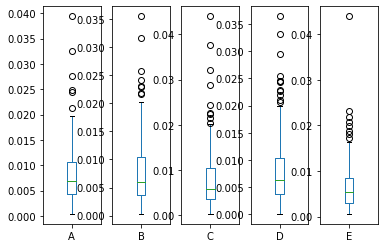

In [15]:
#box and whisker plots
dataset.plot(kind='box', subplots=True, sharex=False, sharey=False)
pyplot.show()

Les cercles noirs dans le "box and whisker plots" montrent qu'il y a des valeurs errone oubien y respect pas la meme format, ce qui veut dire qu'on doit faire 
l'imputation et la tranformation des données

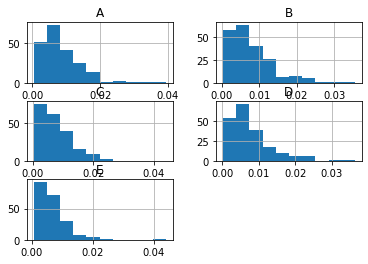

In [16]:
# histograms
dataset.hist()
pyplot.show()

Comme on peut voir les histogramms respectent pas la normalite

# III.2 Multivariate

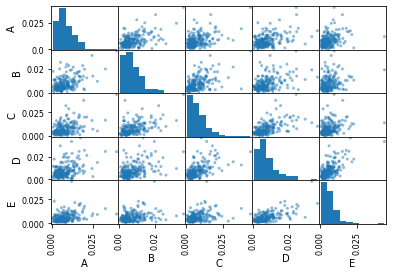

In [17]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

# III.3 Correlation

Une corrélation est une relation statistique entre deux variables dont les valeurs varient dans le même sens ou dans le sens opposé.

In [18]:
print("List 4 Highest Correlation Pairs")
k = dataset.corr().unstack().sort_values(ascending = False).drop_duplicates()
print(k)

List 4 Highest Correlation Pairs
E  E    1.000000
D  E    0.642872
   C    0.550235
A  B    0.515154
B  C    0.509805
A  C    0.463659
B  D    0.431295
D  A    0.430804
A  E    0.349449
C  E    0.329827
B  E    0.287219
dtype: float64


# IV. Prepare Data

# IV.1 Data Cleaning

In [19]:
df=dataset.head(5)
df

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,A,B,C,D,E,F
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


We remove the attribut F wich contains String values or R and M to prevent future problems in the calculations

In [20]:
df=df.iloc[:,:-1].values

In [21]:
df

array([[0.0167, 0.018 , 0.0084, 0.009 , 0.0032],
       [0.0191, 0.014 , 0.0049, 0.0052, 0.0044],
       [0.0244, 0.0316, 0.0164, 0.0095, 0.0078],
       [0.0073, 0.005 , 0.0044, 0.004 , 0.0117],
       [0.0015, 0.0072, 0.0048, 0.0107, 0.0094]])

In [22]:
X = df[: , :10] # input
Y = df[: , : 10] # output
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# IV.2 Rescale

In [23]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
#rescale data between 0 and 1
scaler = MinMaxScaler(feature_range = (0,1))
rescaledX = scaler.fit_transform(X)
#Summarize transform data
set_printoptions(precision = 3)
print(rescaledX[0:10,:])

[[0.664 0.489 0.333 0.746 0.   ]
 [0.769 0.338 0.042 0.179 0.141]
 [1.    1.    1.    0.821 0.541]
 [0.253 0.    0.    0.    1.   ]
 [0.    0.083 0.033 1.    0.729]]


# IV.3 Standarize

In [24]:
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
#Summarize transform data
set_printoptions(precision = 3)
print(rescaledX[0:10,:])

[[ 0.35   0.301  0.136  0.507 -1.307]
 [ 0.64  -0.123 -0.634 -0.953 -0.924]
 [ 1.281  1.74   1.897  0.699  0.159]
 [-0.785 -1.075 -0.744 -1.414  1.402]
 [-1.486 -0.843 -0.656  1.16   0.669]]


# V. Evaluate Some Algorithms

1. Separate out a validation dataset
2. Setup the test harness to use 10-fold cross-validation
3. Build 5 different models to predict species flower measurememts
4. Select the best model

# V.1 Create a Validation Dataset

In [25]:
# Prepare Data
# Split-out validation dataset
yy = dataset.values
X = yy[:,0:5]
Y = yy[:,5]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

# V.2 Test harness / Build Models

In software testing, a test harness or automated test framework is a collection of software and test data configured to test a program unit by running it under varying conditions and monitoring its behavior and outputs. ... Test harnesses allow for the automation of tests.

In [26]:
# Spot-Check Algorithms
models = []
#Logistic Regression to estimate or guess the probability of an event occurring having been given some previous data. Logistic Regression works with binary data, where either the event happens (1) or the event does not happen (0).
models.append(('LR', LogisticRegression())) 
#LDA makes predictions by estimating the probability that a new set of inputs belongs to each class. The class that gets the highest probability is the output class and a prediction is made.
models.append(('LDA', LinearDiscriminantAnalysis()))
#KNN for regression and classification problem. KNN algorithms use data and classify new data points based on similarity measures (e.g. distance function). Classification is done by a majority vote to its neighbors.
models.append(('KNN', KNeighborsClassifier()))
#Is a if elseif Decision maker...to modifyy 
models.append(('CART', DecisionTreeClassifier()))

models.append(('NB', GaussianNB()))
#It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.434559 (0.111547)
LDA: 0.607353 (0.120640)
KNN: 0.536765 (0.091823)
CART: 0.456985 (0.099429)
NB: 0.535294 (0.093359)
SVM: 0.572794 (0.085288)


# V.3 Compare the algorithms

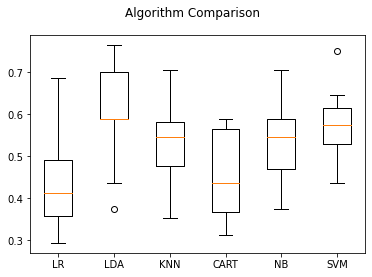

In [27]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# V. Make Predictions

We take the best algorithme (the nearst to 1 ) wich is the LDA is our case...we will work with that on the prediction

In [28]:
# Make predictions on validation dataset
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.47619047619047616
[[13 14]
 [ 8  7]]
              precision    recall  f1-score   support

           M       0.62      0.48      0.54        27
           R       0.33      0.47      0.39        15

    accuracy                           0.48        42
   macro avg       0.48      0.47      0.47        42
weighted avg       0.52      0.48      0.49        42



# VI. Evaluate some Algorithms: Standardize Data

In [29]:
# Standardize the dataset
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
num_folds = 10
seed = 7
scoring = 'accuracy'
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.595588 (0.116109)
ScaledLDA: 0.607353 (0.120640)
ScaledKNN: 0.518750 (0.093305)
ScaledCART: 0.483088 (0.140509)
ScaledNB: 0.535294 (0.093359)
ScaledSVM: 0.512500 (0.092252)


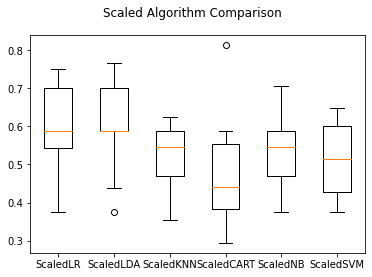

In [30]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# VII Algorithm Tuning (Affiner/optimiser les algorithmes)

# VII.I Tuning KNN

In [31]:
# Tune scaled KNN
from sklearn.model_selection import GridSearchCV
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.560662 using {'n_neighbors': 21}
0.458456 (0.130118) with: {'n_neighbors': 1}
0.488603 (0.082773) with: {'n_neighbors': 3}
0.518750 (0.093305) with: {'n_neighbors': 5}
0.512500 (0.108181) with: {'n_neighbors': 7}
0.500000 (0.078387) with: {'n_neighbors': 9}
0.470588 (0.063827) with: {'n_neighbors': 11}
0.517279 (0.121413) with: {'n_neighbors': 13}
0.541176 (0.153699) with: {'n_neighbors': 15}
0.529044 (0.159869) with: {'n_neighbors': 17}
0.524632 (0.147948) with: {'n_neighbors': 19}
0.560662 (0.119610) with: {'n_neighbors': 21}


# VII.II Tuning SVM

In [32]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values) 
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.590441 using {'C': 0.1, 'kernel': 'linear'}
0.590441 (0.084097) with: {'C': 0.1, 'kernel': 'linear'}
0.464338 (0.127897) with: {'C': 0.1, 'kernel': 'poly'}
0.440809 (0.126317) with: {'C': 0.1, 'kernel': 'rbf'}
0.481250 (0.169632) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.560662 (0.075134) with: {'C': 0.3, 'kernel': 'linear'}
0.464706 (0.136972) with: {'C': 0.3, 'kernel': 'poly'}
0.493382 (0.084556) with: {'C': 0.3, 'kernel': 'rbf'}
0.547794 (0.127823) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.572794 (0.090247) with: {'C': 0.5, 'kernel': 'linear'}
0.482721 (0.145116) with: {'C': 0.5, 'kernel': 'poly'}
0.505882 (0.075992) with: {'C': 0.5, 'kernel': 'rbf'}
0.572059 (0.112865) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.572794 (0.090247) with: {'C': 0.7, 'kernel': 'linear'}
0.494485 (0.143648) with: {'C': 0.7, 'kernel': 'poly'}
0.530147 (0.088079) with: {'C': 0.7, 'kernel': 'rbf'}
0.558824 (0.125830) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.572794 (0.090247) with: {'C': 0.9, 'kernel': 'line

# VIII. Ensemble Methodes

AB: 0.468015 (0.106479)
GBM: 0.475000 (0.095698)
RF: 0.498162 (0.105076)
ET: 0.487132 (0.053939)


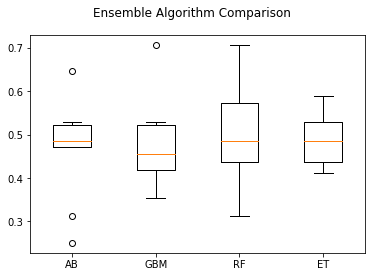

In [33]:
# ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# IX Finalize the Model

In [34]:
# Finalize Model
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=2.0, kernel='linear')
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.38095238095238093
[[ 7 20]
 [ 6  9]]
              precision    recall  f1-score   support

           M       0.54      0.26      0.35        27
           R       0.31      0.60      0.41        15

    accuracy                           0.38        42
   macro avg       0.42      0.43      0.38        42
weighted avg       0.46      0.38      0.37        42



# X. Finalize the Model with Joblib

In [35]:
# Prepare Problem
import warnings
warnings.filterwarnings('ignore')
from joblib import dump
from joblib import load
# Evaluating using a Train and a Test sets
# Load CSV using Pandas
from pandas import read_csv # import pandas.read_csv as read
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
filename = 'sonar.all-data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
# Separate array into input and output components
X = array[:,0:8] # input
Y = array[ :,8] # output
# Seed
seed = 7
test_size = 0.33
# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state=seed)
model = LogisticRegression()
# Fit model for training
model.fit(X_train, Y_train)
# Save the model to disk
filename = 'finalized_model.sav'
dump(model, filename)

['finalized_modelProb1.sav']